In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [23]:
# Number of rooms for each neighbourhood groups
airbnb["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0.5, 1.0, 'Rental Distribution by Neighbourhood Group')

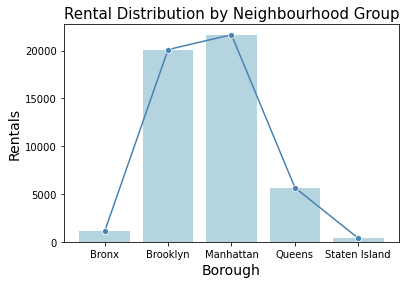

In [27]:
# Plotting with a bar and a line chart
neighbourhood = airbnb.groupby('neighbourhood_group')['neighbourhood'].count().reset_index()
fig,ax = plt.subplots()
sns.barplot(x=neighbourhood[neighbourhood.columns[0]],y=neighbourhood[neighbourhood.columns[1]],color='lightblue',ax=ax)
sns.lineplot(x=neighbourhood[neighbourhood.columns[0]],y=neighbourhood[neighbourhood.columns[1]],color='steelblue',marker='o',ax=ax)
plt.xlabel('Borough',fontsize='14')
plt.ylabel('Rentals', fontsize='14')
plt.title('Rental Distribution by Neighbourhood Group',fontsize='15')

Text(0.5, 1.0, 'Rental Distribution on Map')

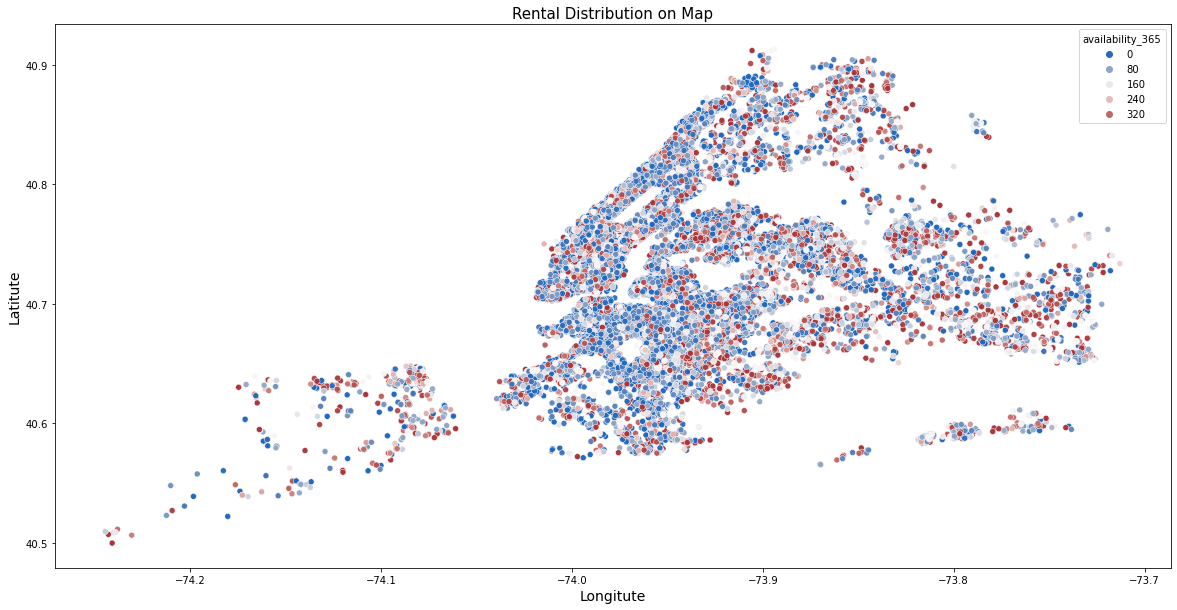

In [28]:
# Avaliability of rooms of each neibourhood on map
f,ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb.availability_365,palette="vlag")
plt.xlabel('Longitute',fontsize='14')
plt.ylabel('Latitute', fontsize='14')
plt.title('Rental Distribution on Map',fontsize='15')


Text(0.5, 1.0, 'Prices of Each Borough')

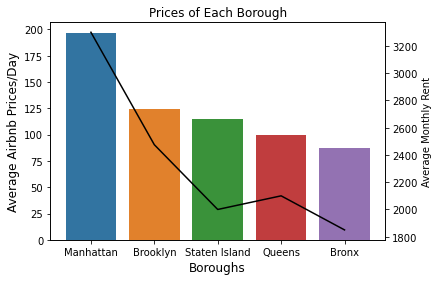

In [41]:
avg_price= airbnb.groupby('neighbourhood_group')["price"].mean().sort_values(ascending=False)
ax = sns.barplot(x= avg_price.index,y= avg_price)
plt.xlabel('Boroughs', fontsize=12)
plt.ylabel('Average Airbnb Prices/Day', fontsize=12)
ax2=ax.twinx()
sns.lineplot(x=['Manhattan','Brooklyn','Staten Island','Queens','Bronx'],y=[3300,2475,2000,2100,1850],color="black")
ax2.set_ylabel('Average Monthly Rent')
ax.set_ylim(ymin=0)

<Figure size 1440x1080 with 0 Axes>

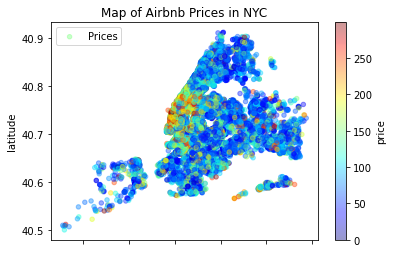

In [52]:
plt.figure(figsize=(20,15))
ax=airbnb[airbnb.price<300].plot(kind='scatter', x='longitude',y='latitude',label='Prices',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
plt.title("Map of Airbnb Prices in NYC")
ax.legend()
plt.ioff()

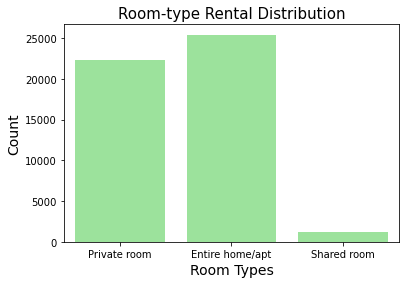

In [11]:
# Room type rental distribution
fig,ax = plt.subplots()
ax = sns.countplot(x=airbnb.room_type, color='lightgreen')
ax.set_xlabel("Room Types", fontsize = '14')
ax.set_ylabel("Count", fontsize = '14')
plt.title('Room-type Rental Distribution', fontsize='15',c='k')
plt.show()

Text(0.5, 1.0, 'Minimum Nights of Private Room')

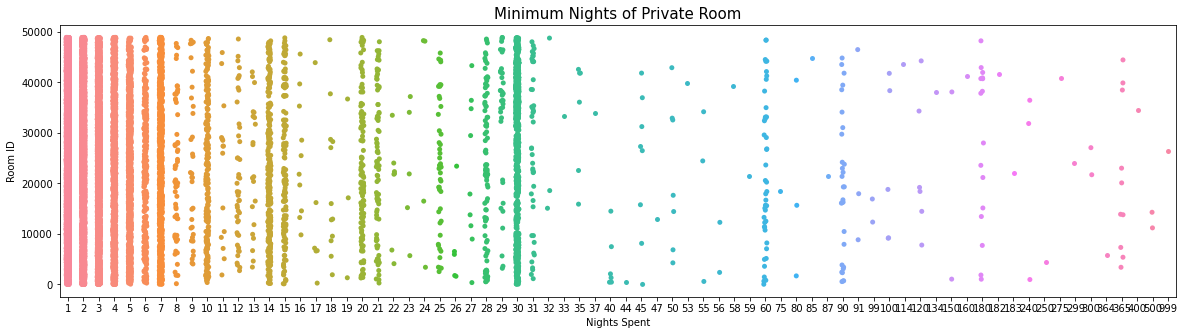

In [20]:
# Minimum nights per reserved room
p1 = airbnb[airbnb.room_type=="Private room"]['minimum_nights']
f,ax = plt.subplots(figsize=(20,5))
ax = sns.stripplot(y= p1.index,x= p1.values)
plt.xlabel("Nights Spent")
plt.ylabel("Room ID")
plt.title("Minimum Nights of Private Room",fontsize='15')

Text(0.5, 1.0, 'Minimum Nights of Shared Room')

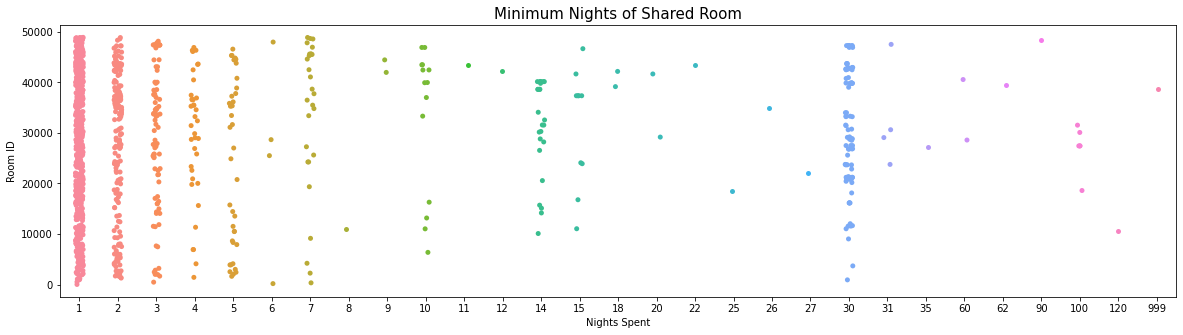

In [21]:
p2 = airbnb[airbnb.room_type=="Shared room"]['minimum_nights']
f,ax = plt.subplots(figsize=(20,5))
ax = sns.stripplot(y= p2.index,x= p2.values)
plt.xlabel("Nights Spent")
plt.ylabel("Room ID")
plt.title("Minimum Nights of Shared Room",fontsize='15')

Text(0.5, 1.0, 'Minimum Nights of Entire Room/Apt')

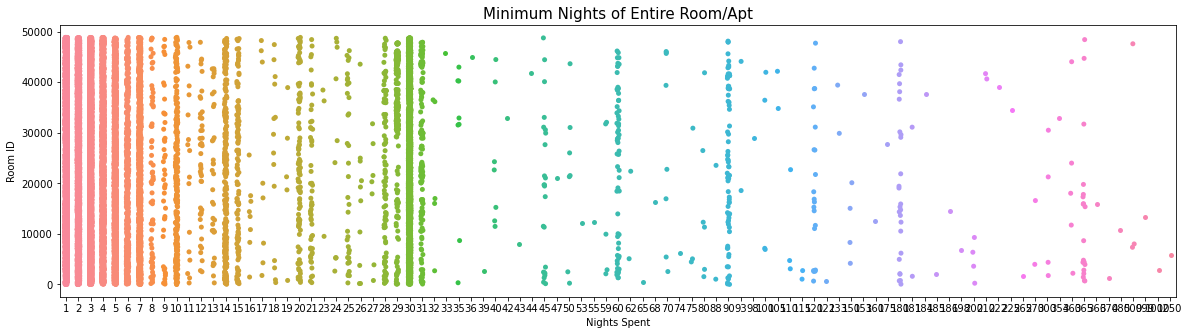

In [22]:
p3 = airbnb[airbnb.room_type=="Entire home/apt"]['minimum_nights']
f,ax = plt.subplots(figsize=(20,5))
ax = sns.stripplot(y= p3.index,x= p3.values)
plt.xlabel("Nights Spent")
plt.ylabel("Room ID")
plt.title("Minimum Nights of Entire Room/Apt",fontsize='15')

Text(0.5, 1.0, 'NYC Airbnb Rent Prices by Borough and Room-types')

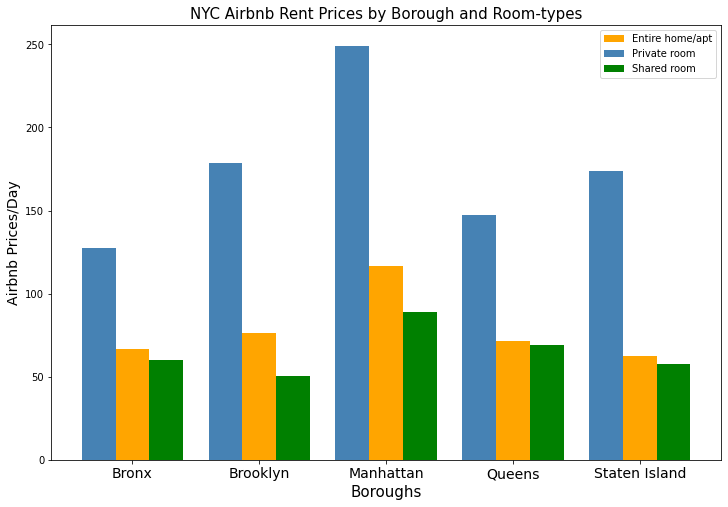

In [61]:
room_price = airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
locations = room_price.neighbourhood_group.unique()
y1 = room_price[room_price['room_type'] == 'Private room']['price'].values
y2 = room_price[room_price['room_type'] == 'Entire home/apt']['price'].values
y3 = room_price[room_price['room_type'] == 'Shared room']['price'].values
fig3,ax2 = plt.subplots(figsize=(12,8))
x1 = [1, 4, 7, 10, 13]
x2 = [0.2, 3.2, 6.2, 9.2, 12.2]
x3 = [1.8, 4.8, 7.8, 10.8, 13.8]
plt.bar(x1, y1, color='orange')
plt.bar(x2, y2, color='steelblue')
plt.bar(x3, y3, color='green')
ax2.set_xticks(range(1,16,3))
ax2.set_xticklabels(locations, fontsize='14')
plt.xlabel('Boroughs',fontsize='15')
plt.ylabel('Airbnb Prices/Day', fontsize='14')
plt.legend(labels=room_price.room_type.unique())
plt.title('NYC Airbnb Rent Prices by Borough and Room-types',fontsize='15')

Text(0.5, 0, 'Host IDs')

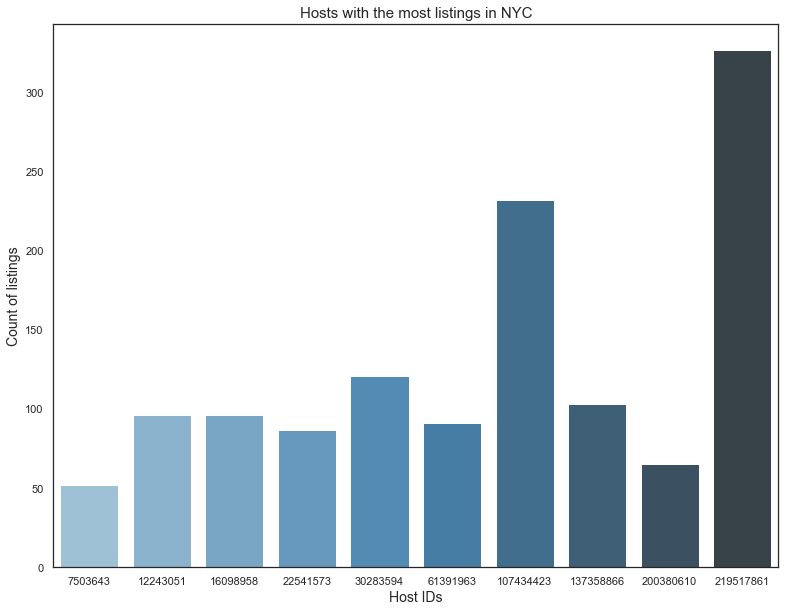

In [81]:
top_host=airbnb.host_id.value_counts().head(10)
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID','host_id':'P_Count'},inplace=True)
f,ax = plt.subplots(figsize=(13,10))
sns.set_style('white')
sns.barplot(x='Host_ID',y='P_Count',data=top_host_df,palette='Blues_d')
plt.title('Hosts with the most listings in NYC',fontsize=15)
plt.ylabel('Count of listings',fontsize=14)
plt.xlabel('Host IDs',fontsize=14)


Text(0.5, 1.0, 'Most-Reviewed Rentals by Location')

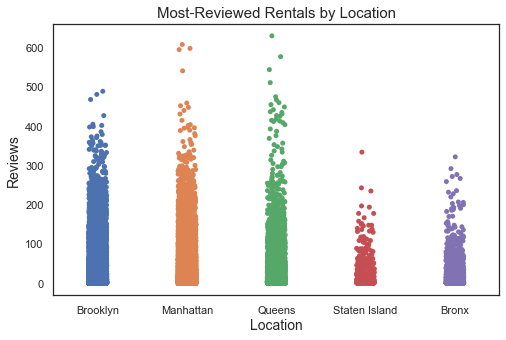

In [112]:
f,ax = plt.subplots(figsize=(8,5))
sns.stripplot(x=airbnb.neighbourhood_group, y=airbnb.number_of_reviews)
plt.ylabel('Reviews', fontsize='14')
plt.xlabel('Location',fontsize='14')
plt.title('Most-Reviewed Rentals by ocation',fontsize='15')

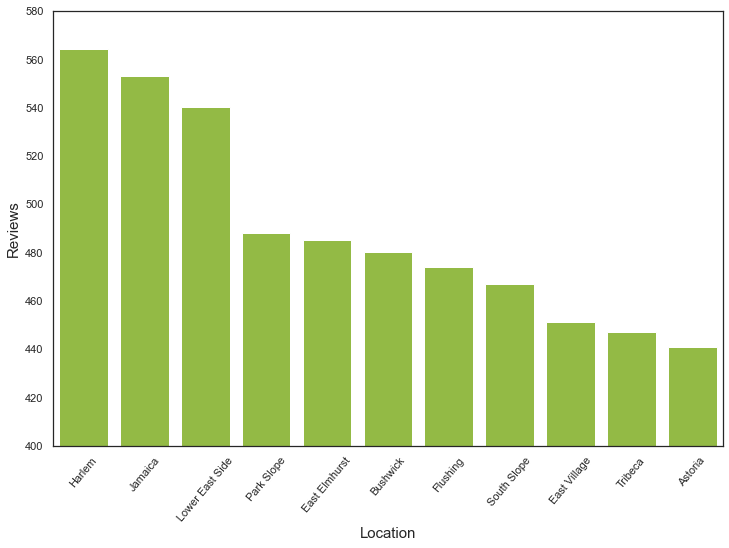

In [117]:
review = airbnb.sort_values('number_of_reviews',ascending=False)
top_reviewed = review.loc[:,['neighbourhood','number_of_reviews']][:20]
top_reviewed = top_reviewed.groupby('neighbourhood').mean().sort_values('number_of_reviews',ascending=False).reset_index()
fig4,ax3 = plt.subplots(figsize=(12,8))
sns.barplot(x=top_reviewed['neighbourhood'],y=top_reviewed['number_of_reviews'].values,color='yellowgreen',ax=ax3)
plt.ylabel('Reviews', fontsize='15')
plt.xlabel('Location',fontsize='15')
plt.ylim((400,580))
for ax in ax3.get_xticklabels():
    ax.set_rotation(50)